# Importación de librerías y datos

## Librerías

In [21]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
#warnings.filterwarnings('ignore')

# Fechas
import calendar


In [24]:
# Modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot


from joblib import dump, load

## Carga de datos

In [25]:
path = 'PEATONES_2021.csv'
datos = pd.read_csv(path, sep=';')

In [26]:
datos.head()

,FECHA,HORA,IDENTIFICADOR,PEATONES,NÚMERO_DISTRITO,DISTRITO,NOMBRE_VIAL,NÚMERO,CÓDIGO_POSTAL,OBSERVACIONES_DIRECCION,LATITUD,LONGITUD
0,01/01/2021 0:00,0:00,PERM_PEA02_PM01,110.0,1,Centro,Calle Fuencarral,22,28004,Calle peatonal,"40,42200905","-3,700891722"
1,01/01/2021 0:00,0:00,PERM_PEA03_PM01,111.0,1,Centro,Calle San Bernardo,36,28015,Acera Pares,"40,42380314","-3,707379398"
2,01/01/2021 0:00,0:00,PERM_PEA04_PM01,15.0,1,Centro,Calle Hortaleza,18,28004,Acera Pares,"40,42107227","-3,70049043"
3,01/01/2021 0:00,0:00,PERM_PEA05_PM01,44.0,1,Centro,Carrera de San Jerónimo,6,28014,Acera Pares,"40,41664098","-3,701246554"
4,01/01/2021 0:00,0:00,PERM_PEA06_PM01,49.0,1,Centro,Calle Atocha,95,28012,Acera Impares,"40,41110888","-3,696471467"


# Preparación de los datos

## Fecha

In [27]:
# datos['FECHA'] = pd.to_datetime(datos['FECHA'])
datos['FECHA'] = datos['FECHA'].replace("-","/")
datos['FECHA'] = pd.to_datetime(datos['FECHA'], format="%d/%m/%Y %H:%M")
print(datos['FECHA'])

0       2021-01-01 00:00:00
1       2021-01-01 00:00:00
2       2021-01-01 00:00:00
3       2021-01-01 00:00:00
4       2021-01-01 00:00:00
                ...        
82531   2021-06-30 23:00:00
82532   2021-06-30 23:00:00
82533   2021-06-30 23:00:00
82534   2021-06-30 23:00:00
82535   2021-06-30 23:00:00
Name: FECHA, Length: 82536, dtype: datetime64[ns]


## Valores vacíos

In [36]:
datos.isna().any()

FECHA                      False
HORA                       False
IDENTIFICADOR              False
PEATONES                   False
NÚMERO_DISTRITO            False
DISTRITO                   False
NOMBRE_VIAL                False
NÚMERO                     False
CÓDIGO_POSTAL              False
OBSERVACIONES_DIRECCION    False
LATITUD                    False
LONGITUD                   False
dia_semana                 False
mes                        False
dtype: bool

## Descomposición de fechas

In [ ]:
dia_semana=[]
mes=[]
for n in datos["FECHA"]:
    dia_semana.append(calendar.day_name[n.weekday()])
    mes.append(calendar.month_name[n.month])
datos["dia_semana"]=dia_semana
datos["mes"]=mes
datos.head()

## Selección de columnas

In [38]:
df=datos.iloc[:, [1,3,8,12,13]] 
df.head()

,HORA,PEATONES,CÓDIGO_POSTAL,dia_semana,mes
0,0:00,110,28004,Friday,January
1,0:00,111,28015,Friday,January
2,0:00,15,28004,Friday,January
3,0:00,44,28014,Friday,January
4,0:00,49,28012,Friday,January


## Codificación One-Hot

In [43]:
df = pd.get_dummies(df)
df.head()

,PEATONES,CÓDIGO_POSTAL,HORA_0:00,HORA_10:00,HORA_11:00,HORA_12:00,HORA_13:00,HORA_14:00,HORA_15:00,HORA_16:00,...,dia_semana_Sunday,dia_semana_Thursday,dia_semana_Tuesday,dia_semana_Wednesday,mes_April,mes_February,mes_January,mes_June,mes_March,mes_May
0,110,28004,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,111,28015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,15,28004,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,28014,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,49,28012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Resto de tipos

In [47]:
df= df.infer_objects()
df.dtypes

PEATONES                int32
CÓDIGO_POSTAL           int64
HORA_0:00               uint8
HORA_10:00              uint8
HORA_11:00              uint8
HORA_12:00              uint8
HORA_13:00              uint8
HORA_14:00              uint8
HORA_15:00              uint8
HORA_16:00              uint8
HORA_17:00              uint8
HORA_18:00              uint8
HORA_19:00              uint8
HORA_1:00               uint8
HORA_20:00              uint8
HORA_21:00              uint8
HORA_22:00              uint8
HORA_23:00              uint8
HORA_2:00               uint8
HORA_3:00               uint8
HORA_4:00               uint8
HORA_5:00               uint8
HORA_6:00               uint8
HORA_7:00               uint8
HORA_8:00               uint8
HORA_9:00               uint8
dia_semana_Friday       uint8
dia_semana_Monday       uint8
dia_semana_Saturday     uint8
dia_semana_Sunday       uint8
dia_semana_Thursday     uint8
dia_semana_Tuesday      uint8
dia_semana_Wednesday    uint8
mes_April 

In [48]:
df["PEATONES"]=df["PEATONES"].astype(int)
df.dtypes

PEATONES                int32
CÓDIGO_POSTAL           int64
HORA_0:00               uint8
HORA_10:00              uint8
HORA_11:00              uint8
HORA_12:00              uint8
HORA_13:00              uint8
HORA_14:00              uint8
HORA_15:00              uint8
HORA_16:00              uint8
HORA_17:00              uint8
HORA_18:00              uint8
HORA_19:00              uint8
HORA_1:00               uint8
HORA_20:00              uint8
HORA_21:00              uint8
HORA_22:00              uint8
HORA_23:00              uint8
HORA_2:00               uint8
HORA_3:00               uint8
HORA_4:00               uint8
HORA_5:00               uint8
HORA_6:00               uint8
HORA_7:00               uint8
HORA_8:00               uint8
HORA_9:00               uint8
dia_semana_Friday       uint8
dia_semana_Monday       uint8
dia_semana_Saturday     uint8
dia_semana_Sunday       uint8
dia_semana_Thursday     uint8
dia_semana_Tuesday      uint8
dia_semana_Wednesday    uint8
mes_April 

## Tratamiento de la variable objetivo

count    82536.000000
mean       170.277297
std        199.539001
min          0.000000
25%         21.000000
50%        100.000000
75%        245.000000
max        999.000000
Name: PEATONES, dtype: float64

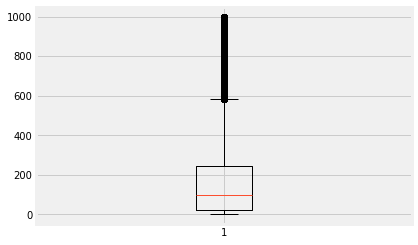

In [49]:
plt.boxplot(df["PEATONES"])
df["PEATONES"].describe()

Estimamos dos poblaciones: aforos por encima y por de bajo de 600 peatones, por lo que se crearán dos modelos distintos

In [53]:
pob1=df[df['PEATONES']<600]
pob2=df[df['PEATONES']>=600]

## Selección etiqueta y conversión a matriz

In [55]:
#pob1
# Label
pob1_labels = np.array(pob1['PEATONES'])
# Eliminamos el label
pob1= pob1.drop('PEATONES', axis = 1)
# Nombres columnas
pob_1feature_list = list(pob1.columns)
# Convertimos en matriz
pob1 = np.array(pob1)

#pob2
# Label
pob2_labels = np.array(pob2['PEATONES'])
# Eliminamos el label
pob2= pob2.drop('PEATONES', axis = 1)
# Nombres columnas
pob_2feature_list = list(pob2.columns)
# Convertimos en matriz
pob2 = np.array(pob2)

## Train y test

In [56]:
#pob1
p1_train_features, p1_test_features, p1_train_labels, p1_test_labels = train_test_split(pob1, pob1_labels, test_size = 0.2, random_state = 42)
#pob2
p2_train_features, p2_test_features, p2_train_labels, p2_test_labels = train_test_split(pob2, pob2_labels, test_size = 0.2, random_state = 42)

In [60]:
print('Población 1:')
print('Training Features tamaño:', p1_train_features.shape)
print('Training Labels tamaño:', p1_train_labels.shape)
print('Testing Features tamaño:', p1_test_features.shape)
print('Testing Labels tamaño:', p1_test_labels.shape)
print('\nPoblación 2:')
print('Training Features tamaño:', p2_train_features.shape)
print('Training Labels tamaño:', p2_train_labels.shape)
print('Testing Features tamaño:', p2_test_features.shape)
print('Testing Labels tamaño:', p2_test_labels.shape)

Población 1:
Training Features tamaño: (62452, 38)
Training Labels tamaño: (62452,)
Testing Features tamaño: (15614, 38)
Testing Labels tamaño: (15614,)

Población 2:
Training Features tamaño: (3576, 38)
Training Labels tamaño: (3576,)
Testing Features tamaño: (894, 38)
Testing Labels tamaño: (894,)


# Entrenamiento

In [61]:
# Modelo pob1
pob1_rf = RandomForestRegressor(n_estimators = 3000, random_state = 42)
# Entrenamiento
pob1_rf.fit(p1_train_features, p1_train_labels);

# Modelo pob2
pob2_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenamiento
pob2_rf.fit(p2_train_features, p2_train_labels);

In [63]:
#pob1
# Testeo
p1_predictions = pob1_rf.predict(p1_test_features)
# Cálculo de errores absolutos
p1_errors = abs(p1_predictions - p1_test_labels)
# MAE
print('Población 1 (menores a 600): --> Mean Absolute Error:', round(np.mean(p1_errors), 2), 'peatones.')

#pob2
# Testeo
p2_predictions = pob2_rf.predict(p2_test_features)
# Cálculo de errores absolutos
p2_errors = abs(p2_predictions - p2_test_labels)
# MAE
print('Población 2 (mayores a 600): --> Mean Absolute Error:', round(np.mean(p2_errors), 2), 'peatones.')

Población 1 (menores a 600): --> Mean Absolute Error: 80.77 peatones.
Población 2 (mayores a 600): --> Mean Absolute Error: 88.75 peatones.
